In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("C:\projects\supply chain delay\DATA\supply_chain_delay_dataset.csv")


<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\kvaru\AppData\Local\Temp\ipykernel_13432\3330938512.py:1: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("C:\projects\supply chain delay\DATA\supply_chain_delay_dataset.csv")


In [3]:
df.shape      # Shows total rows & columns  
df.head()     # Shows first 5 records  
df.info()     # Data types & null check  
df.describe() # Quick numeric summary  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          10000 non-null  int64 
 1   Order_Date        10000 non-null  object
 2   Delivery_Date     10000 non-null  object
 3   Customer_Region   10000 non-null  object
 4   Product_Category  10000 non-null  object
 5   Vendor_Name       10000 non-null  object
 6   Courier           10000 non-null  object
 7   Delivery_Status   10000 non-null  object
 8   Delay_Days        10000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


,Order_ID,Delay_Days
count,10000.00000,10000.00000
mean,5000.50000,3.12100
std,2886.89568,3.34064
min,1.00000,0.00000
25%,2500.75000,0.00000
50%,5000.50000,2.00000
75%,7500.25000,5.00000
max,10000.00000,10.00000


In [4]:
df.isnull().sum()


Order_ID            0
Order_Date          0
Delivery_Date       0
Customer_Region     0
Product_Category    0
Vendor_Name         0
Courier             0
Delivery_Status     0
Delay_Days          0
dtype: int64

In [5]:
df.dtypes


Order_ID             int64
Order_Date          object
Delivery_Date       object
Customer_Region     object
Product_Category    object
Vendor_Name         object
Courier             object
Delivery_Status     object
Delay_Days           int64
dtype: object

In [6]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])


In [7]:
df.dtypes


Order_ID                     int64
Order_Date          datetime64[ns]
Delivery_Date       datetime64[ns]
Customer_Region             object
Product_Category            object
Vendor_Name                 object
Courier                     object
Delivery_Status             object
Delay_Days                   int64
dtype: object

In [8]:
df['Total_Delivery_Days'] = (df['Delivery_Date'] - df['Order_Date']).dt.days


In [9]:
print("\nCleaned Data Sample:\n", df.head())
print("\nSummary Stats:\n", df.describe())


Cleaned Data Sample:
    Order_ID Order_Date Delivery_Date Customer_Region Product_Category  \
0         1 2024-06-04    2024-06-07            East         Clothing   
1         2 2024-06-04    2024-06-17           North       Appliances   
2         3 2024-01-03    2024-01-07           South       Appliances   
3         4 2024-06-21    2024-07-04            West         Clothing   
4         5 2024-01-25    2024-01-28            West        Furniture   

  Vendor_Name   Courier Delivery_Status  Delay_Days  Total_Delivery_Days  
0    Vendor_B  Bluedart       Delivered           0                    3  
1    Vendor_D     FedEx         Delayed          10                   13  
2    Vendor_A  Bluedart         Delayed           1                    4  
3    Vendor_D       DHL         Delayed          10                   13  
4    Vendor_C  Bluedart       Delivered           0                    3  

Summary Stats:
           Order_ID                  Order_Date                  Deliver

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\kvaru\AppData\Local\Temp\ipykernel_13432\4143649140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Delivery_Status', data=df, palette='Set2')


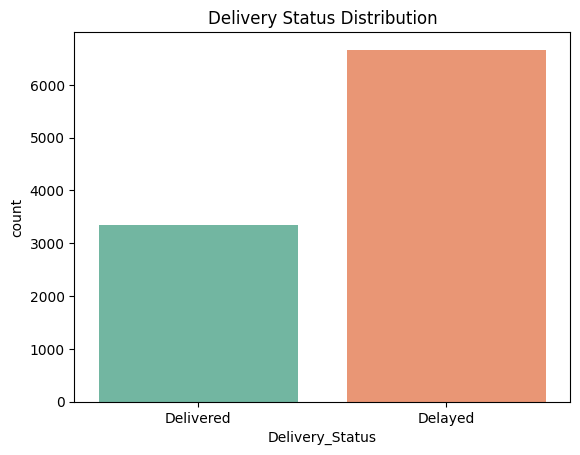

In [11]:
# Count of Delayed vs Delivered Orders
sns.countplot(x='Delivery_Status', data=df, palette='Set2')
plt.title("Delivery Status Distribution")
plt.show()


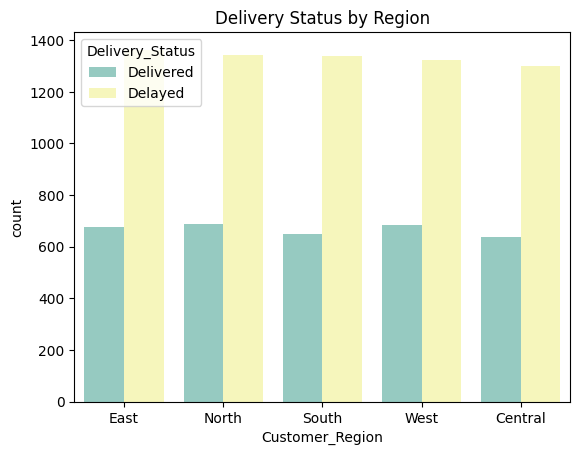

In [12]:
sns.countplot(x='Customer_Region', hue='Delivery_Status', data=df, palette='Set3')
plt.title("Delivery Status by Region")
plt.show()


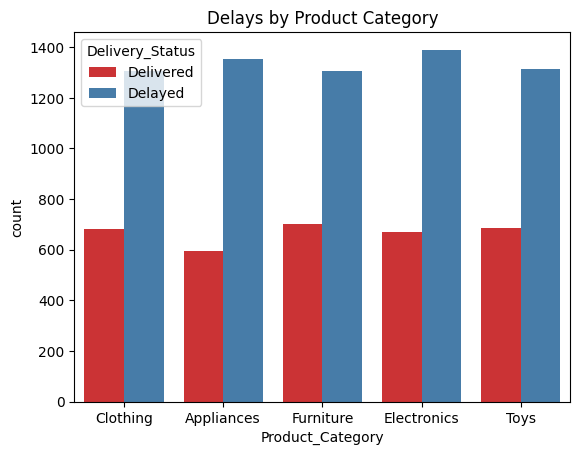

In [13]:
sns.countplot(x='Product_Category', hue='Delivery_Status', data=df, palette='Set1')
plt.title("Delays by Product Category")
plt.show()


In [14]:
# Save Cleaned Data
df.to_csv("cleaned_supply_chain_data.csv", index=False)
